In [1]:
__author__ ="Varun Dhanwantri + Nitin Thapar 2018"

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [62]:
# Stock price 
spot_price = 100

# Long put
strike_price_long_put = 51
premium_long_put = 0.9

# Long call
strike_price_long_call = 95
premium_long_call = 7.5

# Short call
strike_price_short_call = 105
premium_short_call = 2.5

# Stock price range at expiration of the put
iv_range = (0.9, 1.2) # low and high price multiplier
stock_price_range = np.arange(iv_range[0]*spot_price,iv_range[1]*spot_price,1)
stock_price_range = np.floor(stock_price_range)
stock_price_range

array([ 90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99., 100.,
       101., 102., 103., 104., 105., 106., 107., 108., 109., 110., 111.,
       112., 113., 114., 115., 116., 117., 118., 119.])

In [63]:
def long_call(sT, strike_price, premium):
    return np.where(sT > strike_price, (sT - strike_price), 0) - premium

def short_call(sT, strike_price, premium):
    return np.where(sT > strike_price, (strike_price - sT), 0) + premium

In [64]:
payoff_long_call = long_call(stock_price_range, strike_price_long_call, premium_long_call)
payoff_long_call

array([-7.5, -7.5, -7.5, -7.5, -7.5, -7.5, -6.5, -5.5, -4.5, -3.5, -2.5,
       -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,
        9.5, 10.5, 11.5, 12.5, 13.5, 14.5, 15.5, 16.5])

In [65]:
payoff_short_call = short_call(stock_price_range, strike_price_short_call, premium_short_call)
payoff_short_call

array([  2.5,   2.5,   2.5,   2.5,   2.5,   2.5,   2.5,   2.5,   2.5,
         2.5,   2.5,   2.5,   2.5,   2.5,   2.5,   2.5,   1.5,   0.5,
        -0.5,  -1.5,  -2.5,  -3.5,  -4.5,  -5.5,  -6.5,  -7.5,  -8.5,
        -9.5, -10.5, -11.5])

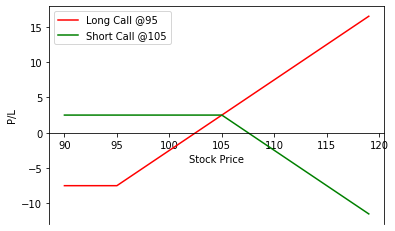

In [66]:
# Plot
fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(stock_price_range, payoff_long_call, label='Long Call @' + str(strike_price_long_call), color='r')
ax.plot(stock_price_range, payoff_short_call, label='Short Call @' + str(strike_price_short_call), color='g')

# ax.annotate('Strike Price', 
#             xy=(strike_price_long_call, 0), 
#             xytext=(strike_price_long_call, 0), 
#             arrowprops = {'facecolor':'blue', 'shrink':0.05})
# ax.set_ylim([-1,3])
plt.xlabel('Stock Price')
plt.ylabel('P/L')
plt.legend()
plt.show()

In [67]:
payoff_combined = payoff_long_call + payoff_short_call
payoff_combined
# print ("Max Profit: Unlimited")
# print ("Max Loss:", min(payoff_strangle))

array([-5., -5., -5., -5., -5., -5., -4., -3., -2., -1.,  0.,  1.,  2.,
        3.,  4.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
        5.,  5.,  5.,  5.])

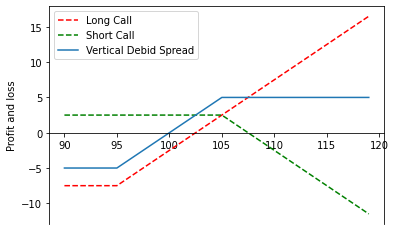

In [68]:
# Plot
fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')

ax.plot(stock_price_range,payoff_long_call,'--',label='Long Call',color='r')
ax.plot(stock_price_range,payoff_short_call,'--',label='Short Call',color='g')
ax.plot(stock_price_range,payoff_combined, label='Vertical Debid Spread')

# plt.xlabel('Stock Price')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()

In [ ]:
# def put_payoff(sT, strike_price, premium):
#       return np.where(sT < strike_price, strike_price - sT, 0) - premium

# payoff_long_put = put_payoff(stock_price_range, strike_price_long_put, premium_long_put)
# payoff_long_put
# # Plot
# fig, ax = plt.subplots()
# ax.spines['bottom'].set_position('zero')
# ax.plot(stock_price_range, payoff_long_put,label='Long Put',color='g')
# plt.xlabel('Stock Price')
# plt.ylabel('Profit and loss')
# plt.legend()
# plt.show()